<a href="https://colab.research.google.com/github/ANU-3006/SOCIAL--MEDIA-SENTIMENTAL-ANALYSIS/blob/main/SOCIAL_MEDIA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colorama


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sentimentdataset (2).csv")

print("🌐 Social Media Sentiment Analysis Journey 🌐")
print("=" * 60)
print(f"Dataset Shape: {df.shape[0]:,} posts across {df.shape[1]} features")
print("=" * 60)

🌐 Social Media Sentiment Analysis Journey 🌐
Dataset Shape: 732 posts across 15 features


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:
# Enhanced null value visualization
def visualize_data_quality():
    """Create an enhanced visualization of data quality"""
    null_data = pd.DataFrame({
        'Feature': df.columns,
        'Data Type': df.dtypes.values,
        'Missing Count': df.isnull().sum().values,
        'Missing %': (df.isnull().sum().values/df.shape[0] * 100).round(2),
        'Unique Values': [df[col].nunique() for col in df.columns]
    })

    # Create a figure with subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Missing Data Distribution', 'Feature Cardinality'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}]]
    )

    # Missing data bar chart
    fig.add_trace(
        go.Bar(x=null_data['Feature'], y=null_data['Missing %'],
               name='Missing %', marker_color='coral'),
        row=1, col=1
    )

    # Unique values bar chart
    fig.add_trace(
        go.Bar(x=null_data['Feature'], y=null_data['Unique Values'],
               name='Unique Values', marker_color='lightblue'),
        row=1, col=2
    )

    fig.update_xaxes(tickangle=45)
    fig.update_layout(height=500, showlegend=False,
                      title_text="Data Quality Assessment")
    fig.show()

    return null_data

null_summary = visualize_data_quality()

# Call the function to display the visualization
null_summary = visualize_data_quality()

In [ ]:
print("\n🧹 Data Cleaning Process...")



🧹 Data Cleaning Process...


In [ ]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags', 'Day', 'Hour', 'Sentiment']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [ ]:
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df['Hour_of_Day'] = df['Timestamp'].dt.hour
df['Is_Weekend'] = df['Timestamp'].dt.dayofweek.isin([5, 6])

In [ ]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month_Name'] = df['Month'].map(month_names)

In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download required resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # important for new NLTK versions

def advanced_clean_text(text):
    """Advanced text cleaning with NLTK"""
    if pd.isna(text):
        return ""

    text = str(text).lower()

    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emojis / special chars
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Tokenize + stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)

    # Stemming
    stemmer = PorterStemmer()
    cleaned_tokens = [
        stemmer.stem(token) for token in tokens
        if token not in stop_words and len(token) > 2
    ]

    return ' '.join(cleaned_tokens)

# Example usage
# df['Clean_Text'] = df['Text'].apply(advanced_clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
print("\n🎭 Performing Sentiment Analysis...")
analyzer = SentimentIntensityAnalyzer()


🎭 Performing Sentiment Analysis...


In [ ]:
df['Clean_Text'] = df['Text'].apply(advanced_clean_text)

df['Sentiment_Scores'] = df['Clean_Text'].apply(lambda x: analyzer.polarity_scores(x))
df['Positive_Score'] = df['Sentiment_Scores'].apply(lambda x: x['pos'])
df['Negative_Score'] = df['Sentiment_Scores'].apply(lambda x: x['neg'])
df['Neutral_Score'] = df['Sentiment_Scores'].apply(lambda x: x['neu'])
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

In [ ]:
def categorize_sentiment(score):
    if score >= 0.5:
        return 'Very Positive'
    elif score >= 0.05:
        return 'Positive'
    elif score <= -0.5:
        return 'Very Negative'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Compound_Score'].apply(categorize_sentiment)
df['Simple_Sentiment'] = df['Compound_Score'].apply(
    lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral')
)

In [ ]:
# Engagement metrics analysis
df['Total_Engagement'] = df['Likes'] + df['Retweets']
df['Engagement_Rate'] = df['Total_Engagement'] / df['Total_Engagement'].max()

In [ ]:
print("\n📊 Platform Distribution:")
platform_stats = df.groupby('Platform').agg({
    'Text': 'count',
    'Likes': 'mean',
    'Retweets': 'mean',
    'Total_Engagement': 'mean'
}).round(2)
print(platform_stats)


📊 Platform Distribution:
           Text  Likes  Retweets  Total_Engagement
Platform                                          
Facebook    231  41.87     20.97             62.84
Instagram   258  45.09     22.60             67.69
Twitter     243  41.56     20.86             62.42


In [ ]:
def create_sentiment_sunburst():
    """Create an interactive sunburst chart for sentiment distribution"""
    sentiment_platform = df.groupby(['Platform', 'Sentiment']).size().reset_index(name='count')

    fig = px.sunburst(sentiment_platform,
                      path=['Platform', 'Sentiment'],
                      values='count',
                      title='Sentiment Distribution Across Platforms',
                      color_discrete_sequence=px.colors.qualitative.Set3)
    fig.update_layout(height=600)
    fig.show()

create_sentiment_sunburst()

# Call the function
create_sentiment_sunburst()

In [ ]:
def create_temporal_analysis():
    """Analyze sentiment trends over time"""
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Sentiment by Year', 'Sentiment by Month',
                       'Sentiment by Day of Week', 'Sentiment by Hour'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}],
               [{'type': 'bar'}, {'type': 'scatter'}]]
    )

    # Year analysis
    year_sentiment = df.groupby(['Year', 'Simple_Sentiment']).size().reset_index(name='count')
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        data = year_sentiment[year_sentiment['Simple_Sentiment'] == sentiment]
        fig.add_trace(
            go.Bar(x=data['Year'], y=data['count'], name=sentiment),
            row=1, col=1
        )

    # Month analysis
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_sentiment = df.groupby(['Month_Name', 'Simple_Sentiment']).size().reset_index(name='count')
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        data = month_sentiment[month_sentiment['Simple_Sentiment'] == sentiment]
        data['Month_Name'] = pd.Categorical(data['Month_Name'], categories=month_order, ordered=True)
        data = data.sort_values('Month_Name')
        fig.add_trace(
            go.Bar(x=data['Month_Name'], y=data['count'], name=sentiment, showlegend=False),
            row=1, col=2
        )

    # Day of week analysis
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_sentiment = df.groupby(['Day_of_Week', 'Simple_Sentiment']).size().reset_index(name='count')
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        data = dow_sentiment[dow_sentiment['Simple_Sentiment'] == sentiment]
        data['Day_of_Week'] = pd.Categorical(data['Day_of_Week'], categories=dow_order, ordered=True)
        data = data.sort_values('Day_of_Week')
        fig.add_trace(
            go.Bar(x=data['Day_of_Week'], y=data['count'], name=sentiment, showlegend=False),
            row=2, col=1
        )

    # Hour analysis
    hour_sentiment = df.groupby(['Hour_of_Day', 'Simple_Sentiment']).size().reset_index(name='count')
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        data = hour_sentiment[hour_sentiment['Simple_Sentiment'] == sentiment]
        fig.add_trace(
            go.Scatter(x=data['Hour_of_Day'], y=data['count'], name=sentiment,
                      mode='lines+markers', showlegend=False),
            row=2, col=2
        )

    fig.update_layout(height=800, title_text="Temporal Sentiment Analysis")
    fig.update_xaxes(tickangle=45, row=1, col=2)
    fig.update_xaxes(tickangle=45, row=2, col=1)
    fig.show()

create_temporal_analysis()

# Call the function
create_temporal_analysis()


In [ ]:
# 3. Geographic Sentiment Map
def create_geographic_analysis():
    """Create geographic sentiment analysis"""
    top_countries = df['Country'].value_counts().head(15).index
    country_sentiment = df[df['Country'].isin(top_countries)].groupby(['Country', 'Simple_Sentiment']).size().reset_index(name='count')

    fig = px.bar(country_sentiment, x='Country', y='count', color='Simple_Sentiment',
                 title='Sentiment Distribution by Top 15 Countries',
                 labels={'count': 'Number of Posts'},
                 color_discrete_map={'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'})
    fig.update_layout(xaxis_tickangle=-45, height=500)
    fig.show()

create_geographic_analysis()

# Call the function
create_geographic_analysis()

In [ ]:
# 4. Engagement Analysis
def create_engagement_analysis():
    """Analyze engagement patterns by sentiment"""
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Likes by Sentiment', 'Retweets by Sentiment',
                       'Engagement Rate Distribution', 'Platform Engagement Comparison')
    )

    # Likes by sentiment
    fig.add_trace(
        go.Box(x=df['Simple_Sentiment'], y=df['Likes'], name='Likes'),
        row=1, col=1
    )

    # Retweets by sentiment
    fig.add_trace(
        go.Box(x=df['Simple_Sentiment'], y=df['Retweets'], name='Retweets'),
        row=1, col=2
    )

    # Engagement rate distribution
    fig.add_trace(
        go.Histogram(x=df['Engagement_Rate'], nbinsx=50, name='Engagement Rate'),
        row=2, col=1
    )

    # Platform engagement comparison
    platform_engagement = df.groupby('Platform')['Total_Engagement'].mean().reset_index()
    fig.add_trace(
        go.Bar(x=platform_engagement['Platform'], y=platform_engagement['Total_Engagement'],
               name='Avg Engagement'),
        row=2, col=2
    )

    fig.update_layout(height=800, showlegend=False, title_text="Engagement Pattern Analysis")
    fig.show()

create_engagement_analysis()

# Call the function
create_engagement_analysis()

In [ ]:
# 5. Advanced Word Analysis
def create_word_analysis():
    """Create comprehensive word analysis visualizations"""
    # Prepare word frequency data
    df['word_list'] = df['Clean_Text'].apply(lambda x: str(x).split())

    # Overall top words
    from collections import Counter
    all_words = [word for words in df['word_list'] for word in words if len(word) > 3]
    word_freq = Counter(all_words).most_common(20)

    # Create visualizations
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Top 20 Most Common Words', 'Positive Sentiment Keywords',
                       'Negative Sentiment Keywords', 'Word Length Distribution'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}],
               [{'type': 'bar'}, {'type': 'histogram'}]]
    )

    # Overall top words
    words, counts = zip(*word_freq)
    fig.add_trace(
        go.Bar(x=list(counts), y=list(words), orientation='h',
               marker_color='lightblue'),
        row=1, col=1
    )

    # Positive sentiment words
    pos_words = [word for words in df[df['Simple_Sentiment'] == 'Positive']['word_list']
                 for word in words if len(word) > 3]
    pos_freq = Counter(pos_words).most_common(15)
    if pos_freq:
        words, counts = zip(*pos_freq)
        fig.add_trace(
            go.Bar(x=list(counts), y=list(words), orientation='h',
                   marker_color='lightgreen'),
            row=1, col=2
        )

    # Negative sentiment words
    neg_words = [word for words in df[df['Simple_Sentiment'] == 'Negative']['word_list']
                 for word in words if len(word) > 3]
    neg_freq = Counter(neg_words).most_common(15)
    if neg_freq:
        words, counts = zip(*neg_freq)
        fig.add_trace(
            go.Bar(x=list(counts), y=list(words), orientation='h',
                   marker_color='lightcoral'),
            row=2, col=1
        )

    # Word length distribution
    word_lengths = [len(word) for words in df['word_list'] for word in words]
    fig.add_trace(
        go.Histogram(x=word_lengths, nbinsx=20, marker_color='lightyellow'),
        row=2, col=2
    )

    fig.update_layout(height=800, showlegend=False, title_text="Comprehensive Word Analysis")
    fig.show()

create_word_analysis()

# Call the function
create_word_analysis()

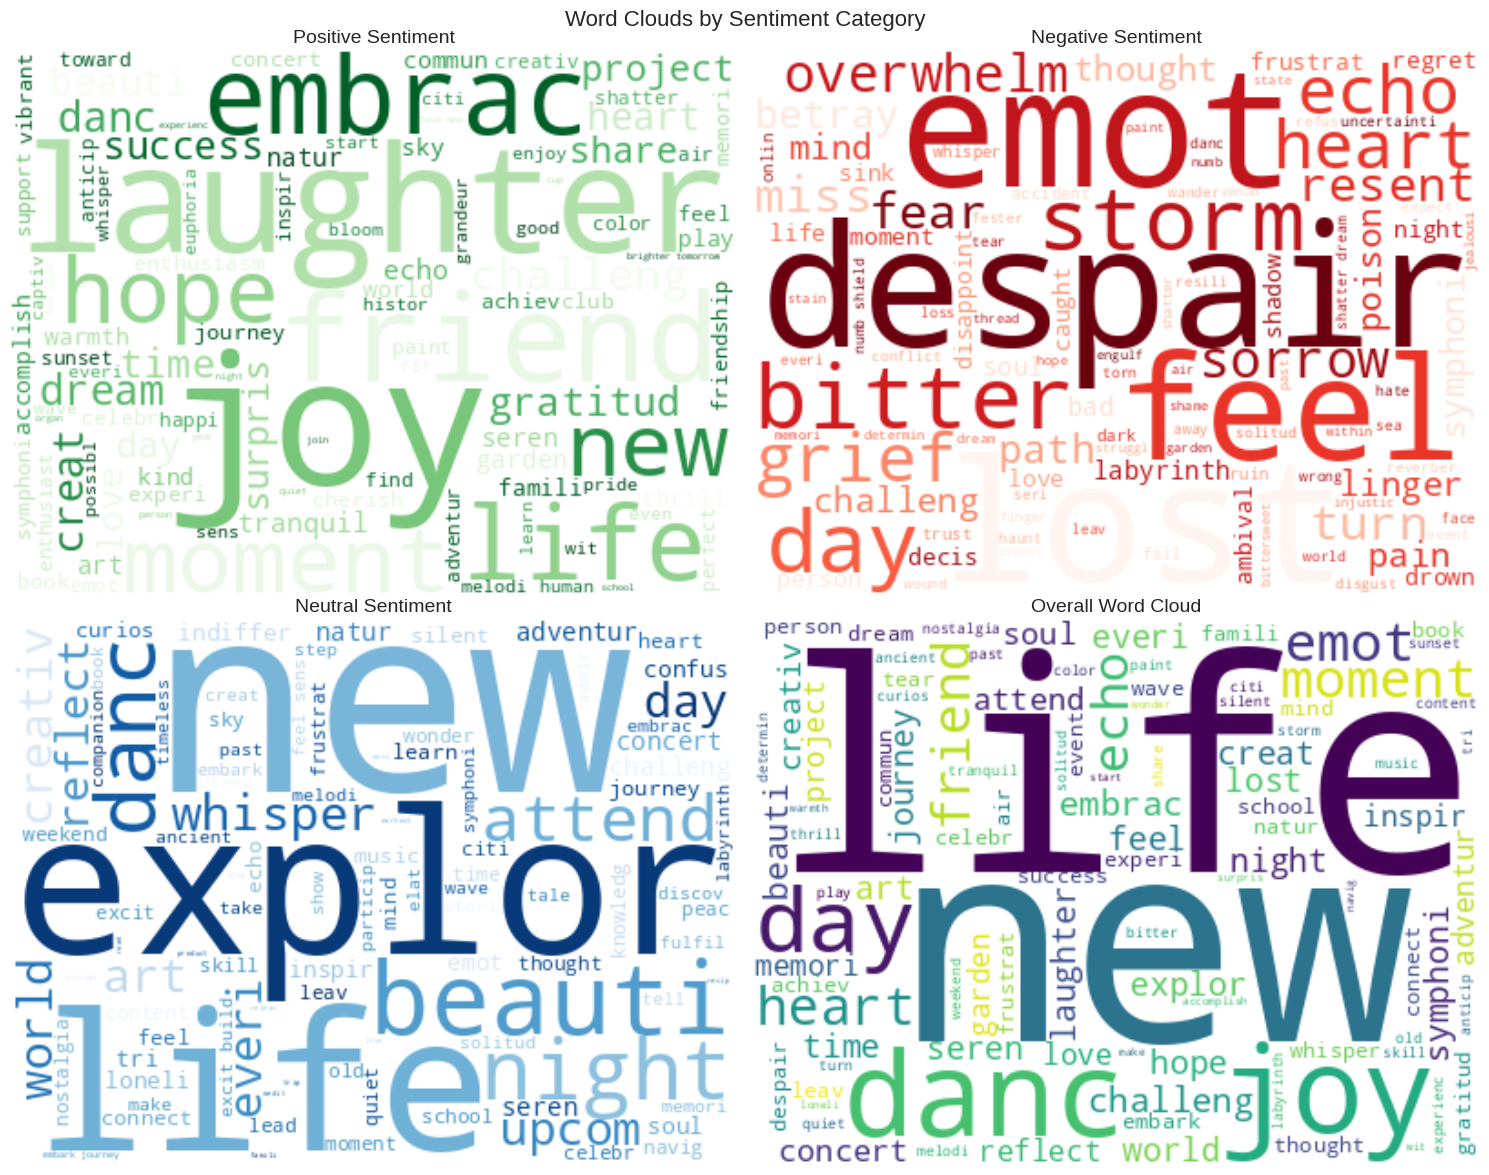

In [ ]:
# 6. Enhanced Word Clouds
def create_sentiment_wordclouds():
    """Create word clouds for each sentiment category"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Word Clouds by Sentiment Category', fontsize=16)

    sentiments = ['Positive', 'Negative', 'Neutral']
    colors = ['Greens', 'Reds', 'Blues']

    for idx, (sentiment, colormap) in enumerate(zip(sentiments, colors)):
        if idx < 3:
            row = idx // 2
            col = idx % 2

            words = ' '.join([' '.join(words) for words in
                            df[df['Simple_Sentiment'] == sentiment]['word_list']])

            if words:
                wordcloud = WordCloud(width=400, height=300,
                                    background_color='white',
                                    colormap=colormap,
                                    max_words=100).generate(words)

                axes[row, col].imshow(wordcloud, interpolation='bilinear')
                axes[row, col].set_title(f'{sentiment} Sentiment', fontsize=14)
                axes[row, col].axis('off')

    # Overall word cloud
    all_words = ' '.join([' '.join(words) for words in df['word_list']])
    wordcloud = WordCloud(width=400, height=300,
                         background_color='white',
                         colormap='viridis',
                         max_words=100).generate(all_words)

    axes[1, 1].imshow(wordcloud, interpolation='bilinear')
    axes[1, 1].set_title('Overall Word Cloud', fontsize=14)
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

create_sentiment_wordclouds()

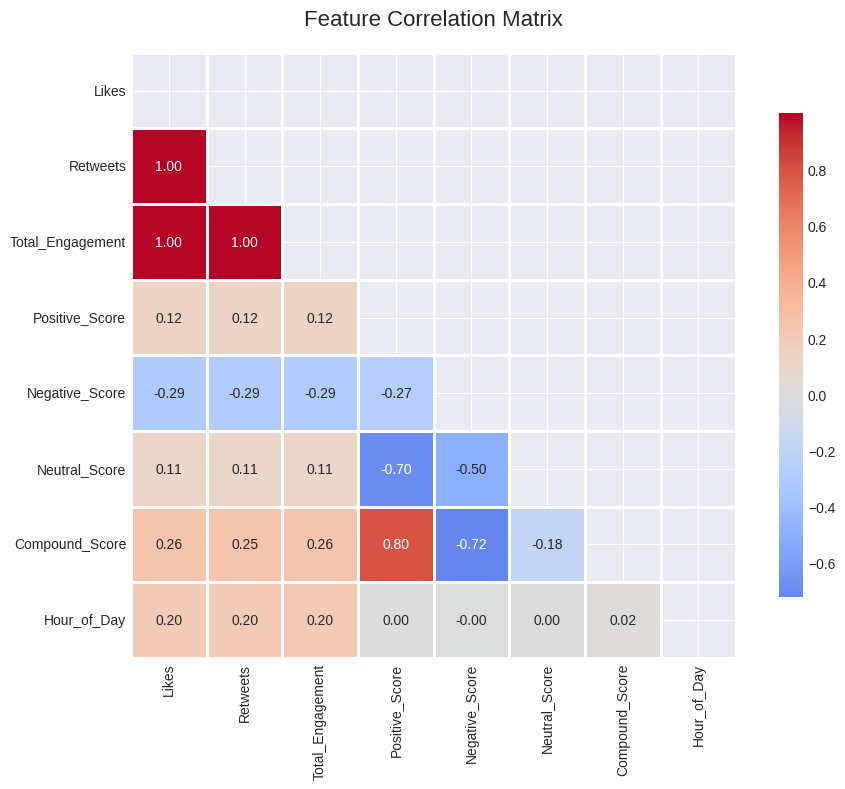

In [ ]:
def create_correlation_heatmap():
    """Create correlation heatmap for numerical features"""
    numerical_features = ['Likes', 'Retweets', 'Total_Engagement',
                         'Positive_Score', 'Negative_Score', 'Neutral_Score',
                         'Compound_Score', 'Hour_of_Day']

    corr_matrix = df[numerical_features].corr()

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', square=True, linewidths=1,
                cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

create_correlation_heatmap()

In [ ]:
print("\n🤖 Machine Learning Model Development...")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


🤖 Machine Learning Model Development...


In [ ]:
try:
    import xgboost as xgb
    xgboost_available = True
except ImportError:
    xgboost_available = False
    print("XGBoost not available, will skip this model")

In [ ]:
# Prepare data for modeling
X = df['Clean_Text'].values
y = df['Simple_Sentiment'].values
# Encode labels for models that require numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
# Model comparison
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': MultinomialNB()
}

if xgboost_available:
    models['XGBoost'] = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use encoded labels for XGBoost
    if name == 'XGBoost' and xgboost_available:
        model.fit(X_train_tfidf, y_train_enc)
        y_pred_encoded = model.predict(X_test_tfidf)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)

        accuracy = accuracy_score(y_test, y_pred)
        cv_scores = cross_val_score(model, X_train_tfidf, y_train_enc, cv=5)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)

    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Training Logistic Regression...
Logistic Regression - Accuracy: 0.6939, CV Mean: 0.6598 (+/- 0.0463)

Training Random Forest...
Random Forest - Accuracy: 0.6871, CV Mean: 0.6872 (+/- 0.0318)

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.7007, CV Mean: 0.6718 (+/- 0.0464)

Training SVM...
SVM - Accuracy: 0.7007, CV Mean: 0.6974 (+/- 0.0655)

Training Naive Bayes...
Naive Bayes - Accuracy: 0.6735, CV Mean: 0.6684 (+/- 0.0560)

Training XGBoost...
XGBoost - Accuracy: 0.6939, CV Mean: 0.7060 (+/- 0.0613)


In [ ]:
# Visualize model comparison
def visualize_model_comparison():
    """Create visualization comparing model performances"""
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]
    cv_means = [results[name]['cv_mean'] for name in model_names]
    cv_stds = [results[name]['cv_std'] for name in model_names]

    fig = go.Figure()

    # Test accuracy
    fig.add_trace(go.Bar(
        name='Test Accuracy',
        x=model_names,
        y=accuracies,
        text=[f'{acc:.3f}' for acc in accuracies],
        textposition='auto',
    ))

    # CV scores with error bars
    fig.add_trace(go.Bar(
        name='CV Mean Score',
        x=model_names,
        y=cv_means,
        text=[f'{mean:.3f}' for mean in cv_means],
        textposition='auto',
        error_y=dict(type='data', array=cv_stds)
    ))

    fig.update_layout(
        title='Model Performance Comparison',
        xaxis_title='Model',
        yaxis_title='Score',
        barmode='group',
        height=500
    )
    fig.show()

visualize_model_comparison()

In [ ]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\n🏆 Best Model: {best_model_name}")


🏆 Best Model: Gradient Boosting


In [ ]:
# Hyperparameter tuning for best model
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2']
    }
    base_model = LogisticRegression(max_iter=1000, random_state=42)
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
    base_model = RandomForestClassifier(random_state=42)
else:
    # Use default best model without tuning
    base_model = models[best_model_name]
    param_grid = {}

if param_grid:
    print(f"\n🔧 Hyperparameter Tuning for {best_model_name}...")
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Final evaluation
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test_tfidf)
else:
    best_model = base_model

In [ ]:
#hyperparameter tuning for best model
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2']
    }
    base_model = LogisticRegression(max_iter=1000, random_state=42)
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
    base_model = RandomForestClassifier(random_state=42)
else:
    # Use default best model without tuning
    base_model = models[best_model_name]
    param_grid = {}

if param_grid:
    print(f"\n🔧 Hyperparameter Tuning for {best_model_name}...")
    grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Final evaluation
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test_tfidf)
else:
    best_model = base_model
    y_pred_best = results[best_model_name]['predictions']

In [ ]:
print(f"\n📊 Detailed Evaluation of {best_model_name}:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


📊 Detailed Evaluation of Gradient Boosting:

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.65      0.74        31
     Neutral       0.61      0.54      0.57        46
    Positive       0.70      0.83      0.76        70

    accuracy                           0.70       147
   macro avg       0.73      0.67      0.69       147
weighted avg       0.71      0.70      0.70       147



In [ ]:
# Confusion Matrix Visualization
def plot_enhanced_confusion_matrix():
    """Create an enhanced confusion matrix visualization"""
    cm = confusion_matrix(y_test, y_pred_best)
    labels = ['Negative', 'Neutral', 'Positive']

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create annotated heatmap
    annotations = [[f'{cm[i,j]}\n({cm_percent[i,j]:.1f}%)'
                   for j in range(len(labels))]
                  for i in range(len(labels))]

    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=labels,
        y=labels,
        text=annotations,
        texttemplate='%{text}',
        colorscale='Blues',
        showscale=True
    ))

    fig.update_layout(
        title=f'Confusion Matrix - {best_model_name}',
        xaxis_title='Predicted Label',
        yaxis_title='True Label',
        height=500
    )
    fig.show()

plot_enhanced_confusion_matrix()

# Call the function
plot_enhanced_confusion_matrix()


In [ ]:
if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
    print("\n🔍 Feature Importance Analysis...")

    feature_names = vectorizer.get_feature_names_out()

    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        top_indices = importances.argsort()[-20:][::-1]
    else:  # For linear models
        # Get absolute values of coefficients for each class
        importances = np.abs(best_model.coef_).mean(axis=0)
        top_indices = importances.argsort()[-20:][::-1]

    top_features = [(feature_names[i], importances[i]) for i in top_indices]

    # Visualize top features
    fig = go.Figure([go.Bar(
        x=[imp for _, imp in top_features],
        y=[feat for feat, _ in top_features],
        orientation='h'
    )])

    fig.update_layout(
        title=f'Top 20 Most Important Features - {best_model_name}',
        xaxis_title='Importance Score',
        yaxis_title='Feature',
        height=600
    )
    fig.show()


🔍 Feature Importance Analysis...


In [ ]:
# Summary statistics
print("\n📈 Summary Statistics:")
print(f"Total posts analyzed: {len(df):,}")
print(f"Date range: {df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}")
print(f"\nSentiment Distribution:")
sentiment_dist = df['Simple_Sentiment'].value_counts(normalize=True) * 100
for sentiment, percentage in sentiment_dist.items():
    print(f"  {sentiment}: {percentage:.2f}%")

print(f"\nPlatform Distribution:")
platform_dist = df['Platform'].value_counts()
for platform, count in platform_dist.items():
    print(f"  {platform}: {count:,} posts ({count/len(df)*100:.2f}%)")

print(f"\nTop 5 Countries by Post Volume:")
top_countries = df['Country'].value_counts().head(5)
for country, count in top_countries.items():
    print(f"  {country}: {count:,} posts")

print(f"\nEngagement Metrics:")
print(f"  Average Likes: {df['Likes'].mean():.2f}")
print(f"  Average Retweets: {df['Retweets'].mean():.2f}")
print(f"  Maximum Engagement: {df['Total_Engagement'].max():,}")

print("\n✨ Analysis Complete! ✨")


📈 Summary Statistics:
Total posts analyzed: 732
Date range: 2010-05-15 to 2023-10-22

Sentiment Distribution:
  Positive: 47.81%
  Neutral: 31.28%
  Negative: 20.90%

Platform Distribution:
  Instagram: 258 posts (35.25%)
  Twitter: 243 posts (33.20%)
  Facebook: 231 posts (31.56%)

Top 5 Countries by Post Volume:
  USA: 188 posts
  UK: 143 posts
  Canada: 135 posts
  Australia: 75 posts
  India: 70 posts

Engagement Metrics:
  Average Likes: 42.90
  Average Retweets: 21.51
  Maximum Engagement: 120.0

✨ Analysis Complete! ✨
